# Elementary Matrix Notebook

This notebook serves to generate examples of what elementary matrices are, and how we can generate them with code

The cell beneath this will give several examples of what an elementary matrix actually is

## Examples of Elementary Matrices

These matrices consist of square invertible matrices and appear in one of three different varieties.

For comparison, please refer to the identity matrix.

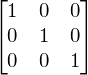

In [15]:
eye(3)

### First example:
This matrix represents the row operation of swapping the position of two rows belonging to some matrix multiplied by this elementary matrix

This matrix will swap the second and third rows of any '3xm matrix' 
    

In [21]:
pprint(Matrix([[1,0,0],[0,0,1],[0,1,0]]))
pprint(Matrix([[5,0,1],[4,22,1],[3,1,3]]))
pprint(Matrix([[1,0,0],[0,0,1],[0,1,0]])*Matrix([[5,0,1],[4,22,1],[3,1,3]]))

⎡1  0  0⎤
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  1  0⎦
⎡5  0   1⎤
⎢        ⎥
⎢4  22  1⎥
⎢        ⎥
⎣3  1   3⎦
⎡5  0   1⎤
⎢        ⎥
⎢3  1   3⎥
⎢        ⎥
⎣4  22  1⎦


### Second example:

This matrix represents the row operation of multiplying a row of another matrix by a scalar multiple.

Here is one example of what this elementary matrix might look like.

In [24]:
pprint(Matrix([[-10,0,0],[0,1,0],[0,0,1]]))
pprint(Matrix([[5,0,1],[4,22,1],[3,1,3]]))
pprint(Matrix([[-10,0,0],[0,1,0],[0,0,1]])*Matrix([[5,0,1],[4,22,1],[3,1,3]]))

⎡-10  0  0⎤
⎢         ⎥
⎢ 0   1  0⎥
⎢         ⎥
⎣ 0   0  1⎦
⎡5  0   1⎤
⎢        ⎥
⎢4  22  1⎥
⎢        ⎥
⎣3  1   3⎦
⎡-50  0   -10⎤
⎢            ⎥
⎢ 4   22   1 ⎥
⎢            ⎥
⎣ 3   1    3 ⎦


### Third Example

This one is my favorite, it is an elementary matrix that transforms another matrix by adding a multiple of one row to another.

How cool is that?


It is a little tricky to explain what is happening though. If my elementary matrix has more than just a one in the row then imagine the values in those positions as being instructions about how what multiple of another row to add to the current one.

For example if our first row contains a -7 in the third column, those instructions are to add -7 times the third row to the first. See this in action below.

In [26]:
pprint(Matrix([[1,0,-7],[0,1,0],[0,0,1]]))
pprint(Matrix([[5,0,1],[4,22,1],[3,1,3]]))
pprint(Matrix([[1,0,-7],[0,1,0],[0,0,1]])*Matrix([[5,0,1],[4,22,1],[3,1,3]]))

⎡1  0  -7⎤
⎢        ⎥
⎢0  1  0 ⎥
⎢        ⎥
⎣0  0  1 ⎦
⎡5  0   1⎤
⎢        ⎥
⎢4  22  1⎥
⎢        ⎥
⎣3  1   3⎦
⎡-16  -7  -20⎤
⎢            ⎥
⎢ 4   22   1 ⎥
⎢            ⎥
⎣ 3   1    3 ⎦


## Getting started

Now that a foundational understanding of elementary matrices has been

first we must load the required backup packages

In [1]:
# %load './RREF_real.py'
%matplotlib
from __future__ import division
import random
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()

Using matplotlib backend: Qt4Agg


## Loading the previous RREF Script

The best way to explain what an elementary matrix is comes from using the RREF algorithm that was created in one of the other notebooks

Essentially we will only be extending this previous set of functions with a way of tracking the row operations in the form of a number of elementary matrices

In [5]:
import ipdb
row_op_storage = [eye(trbl_mkr.shape[0])]
def rolling_rep(mtx,row_starting):
    global row_op_storage
    rep_row = mtx[row_starting,:]
    ret_mat = mtx.copy()
    ret_mat.row_del(row_starting)
    return ret_mat.row_insert(ret_mat.rows,rep_row)

def target_swap(mtx,row,lst):
    global row_op_storage
    ret_mtx = mtx.copy()
    rep_ind = find_nonzero_ind(lst,row)
    stor_rep_row = eye(trbl_mkr.shape[0])[rep_ind,:] # means take the most recent stored mtx and grab the row from it
    tmp_mtx = eye(trbl_mkr.shape[0]).copy()
    tmp_mtx[rep_ind,:] = eye(trbl_mkr.shape[0])[row,:]
    tmp_mtx[row,:] = stor_rep_row
    row_op_storage.append(tmp_mtx)
    if rep_ind:
        rep_row = ret_mtx[rep_ind,:]
        ret_mtx[rep_ind,:] = ret_mtx[row,:]
        ret_mtx[row,:] =rep_row
        return ret_mtx
    return False

def find_nonzero_ind(lst,row,backwards=False):
    global row_op_storage
    if backwards:
        lst_to_bool = [x == 0 if i < row else True for i,x in enumerate(lst)]
    else:
        lst_to_bool = [x == 0 if i > row else True for i,x in enumerate(lst)]
    if False not in lst_to_bool:
        return False
    return lst_to_bool.index(False)

def add_mult_row(mtx,piv_row,other):
    global row_op_storage
    return solve(piv_row*x+ other,x)[0]



def shortEF(mtx):
    global row_op_storage
    pivots = []
    cop = mtx.copy()
    row,col = 0,0
    try_cap = cop.rows + 30
    while row < cop.rows and col < cop.cols: #took off -1 from cop.rows mighthave broken stuff
        col_list = list(cop[:,col])
        if try_cap < 0:
            return (row,col)
        if col_list.count(0) == cop.rows or col_list[row:].count(0) > cop.rows -1 -row:
            col +=1
            continue
        if cop[row,col] == 0 :
                #cop = rolling_rep(cop,row)
                cop = target_swap(cop,row,col_list)
                try_cap -=1
                continue
        if col_list[row:].count(0) == cop.rows -1 -row:
            pivots.append((row,col))
            col +=1
            row +=1
            continue
        else:
            
            rep_ind = find_nonzero_ind(col_list,row) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(cop,cop[row,col],cop[rep_ind,col])
            cop[rep_ind,:] += cop[row,:]*multiple_factor
            tmp_mtx = eye(trbl_mkr.shape[0])
            tmp_mtx[rep_ind,col] += multiple_factor #this will add the correct value to the zero element to make an elementary matrix that can be multiplied with the original matrix to give us the row operation result
            row_op_storage.append(tmp_mtx) # currently this is giving me only a single row, not the whole matrix
    reduce_row(cop,pivots)
    return cop

def reduce_row(mtx,pivot_lst):
    global row_op_storage
    pivot_lst.reverse()
    for row,col in pivot_lst:
        divider_val = mtx[row,col]
        mtx[row,:] = mtx[row,:]/divider_val
        tmp_mtx = eye(trbl_mkr.shape[0]) #making sure to add another entry to the list of elementary matrices
        tmp_mtx[row,col] = 1/divider_val
        row_op_storage.append(tmp_mtx)
        col_list = list(mtx[:,col])
        while col_list.count(0) < mtx.rows -1:
            rep_ind = find_nonzero_ind(col_list,row,True) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(mtx,mtx[row,col],mtx[rep_ind,col])
            mtx[rep_ind,:] += mtx[row,:]*multiple_factor
            tmp_mtx = eye(trbl_mkr.shape[0])
            tmp_mtx[rep_ind,col] += multiple_factor 
            row_op_storage.append(tmp_mtx) 
            col_list = list(mtx[:,col])

    
## trbl seems to be about two zeros next to each other, fixed by using a check against 


##ipdb.runcall(shortEF,trbl_makr)

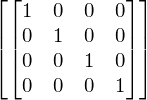

In [8]:
trbl_mkr = Matrix(4,3,[random.randrange(1,100) if random.randrange(1,5) > 3 else 0 for i in range(12)])

row_op_storage = [eye(trbl_mkr.shape[0])]
row_op_storage

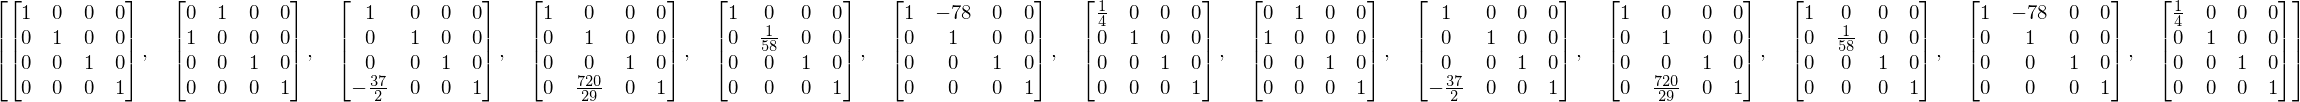

In [12]:
result = shortEF(trbl_mkr)

row_op_storage

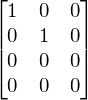

In [11]:
comp_mtx = eye(trbl_mkr.shape[0])
for mtx in row_op_storage:
    comp_mtx = mtx*comp_mtx #this is the correct order to make sure that the product below comes out as the identity matrix
    
comp_mtx*trbl_mkr
    


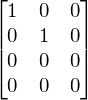

In [13]:
result
